## Recurrent Neural Networks 循环神经网络的原理及应用

循环神经网络是我们常用的一个网络模型，这个网络能够处理例如字符串，时间序列等问题。因为模型对序列问题的优势，RNN模型已经成为了自然语言处理问题的常见方法。

在本课程的作业中，我们将完成三个任务：

0. 基于任务驱动，实际感受并能够初步使用pytorch；
1. 使用RNN模型进行名字的国籍分类；(这个程序主要是参考的Pytorch文档)

RNN也可以用于金融数据的预测，例如:
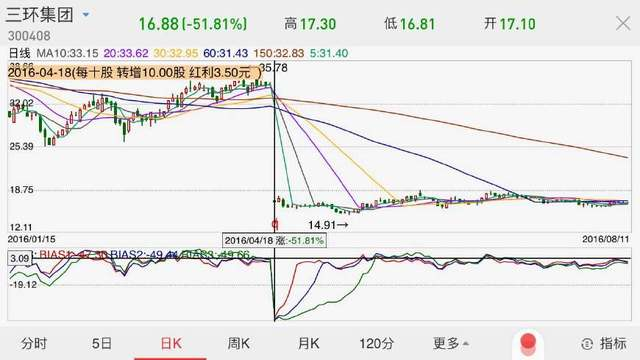

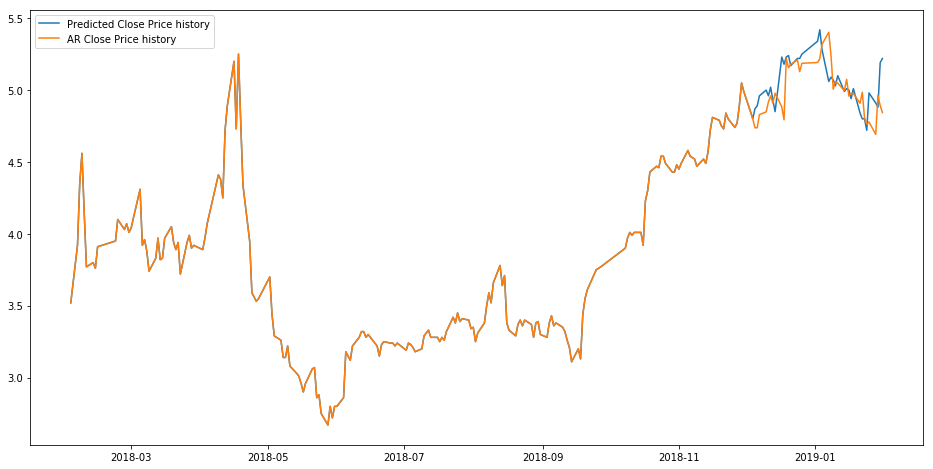

上图中蓝色的部分就是预测值， 关于RNN模型对金融数据的预测，我们只会会增加专门的研讨课程，给大家讲解

我们今天带给大家的是使用RNN进行名字的国籍分类:

## 1. 使用RNN模型进行名字的国籍分类

首先，我们下载数据: 将这个数据置于和我们jupyter notebook位置相同的地方

#### 1.1 我们利用通配符，打印出所有的文件

In [1]:
from io import open
import glob
import os
import matplotlib.pyplot as plt


def find_files(path): return glob.glob(path)

print(find_files('data/names/*.txt'))

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']


### 1.2 名字里边包含不少非Ascii码，为了简便问题，我们将他们转化为Ascii码

In [2]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_2_Ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicode_2_Ascii('Ślusàrski'))

Slusarski


In [3]:
(all_letters)

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [4]:
n_letters

57

### Step1.3 然后我们建立类别和对于的名字的dictionary对应

In [5]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def read_lines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicode_2_Ascii(line) for line in lines]

for filename in find_files('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = read_lines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [6]:
n_categories

18

In [7]:
category_lines['Chinese'][:10]

['Ang', 'AuYong', 'Bai', 'Ban', 'Bao', 'Bei', 'Bian', 'Bui', 'Cai', 'Cao']

### 1.4 这一次我们使用pytorch, 来进行向量化

In [8]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letter_to_index(letter)] = 1
    return tensor

print(letter_to_index('J'))

print(line_to_tensor('Jones').size())

35
torch.Size([5, 1, 57])


In [9]:
line_to_tensor('Jones')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

我们可以看到，是对名字里的每个字符做了 one-hot操作

### 1.5 然后，我们构建一个这样的RNN网络

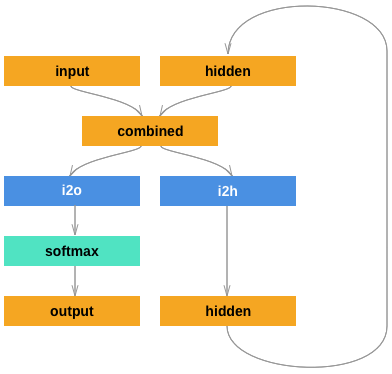

In [10]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1) # 将input和之前的网络中的隐藏层参数合并。
        hidden = self.i2h(combined)# 计算隐藏层参数
        output = self.i2o(combined)# 计算网络输出的结果
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        # 初始化隐藏层参数hidden        
        return torch.zeros(1, self.hidden_size)

n_hidden = 128

In [11]:
# 创建RNN的实例
rnn = RNN(
    input_size=n_letters,    # 输入每个字母向量的长度（57个字符）
    hidden_size=n_hidden,  # 隐藏层向量的长度，神经元个数。这里可自行调整参数大小
    output_size=n_categories    # 语言的种类数目
)
rnn

RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax()
)

### 1.6 运行一步RNN

为了运行这个rnn网络，我们需要给他一个input，然后再加上一个hidden state. 然后我们就能过获得一个output，这个output便是的是这个单词的属于每个国家的概率，和接下来的hidden state.

In [12]:
input = letter_to_tensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)# 直接调用对象，会调用forward函数

In [16]:
output

tensor([[-2.8757, -2.7966, -3.0031, -2.9165, -2.8585, -2.9023, -2.8557, -2.9234,
         -2.9855, -2.9787, -2.8175, -2.8792, -2.8704, -2.9474, -2.8430, -2.9164,
         -2.8216, -2.8646]], grad_fn=<LogSoftmaxBackward>)

In [17]:
next_hidden

tensor([[-0.0523, -0.0685,  0.0682, -0.0922,  0.0226, -0.0558, -0.0172, -0.0052,
         -0.0388, -0.0379,  0.0756,  0.0247,  0.1320, -0.0002,  0.0315, -0.1050,
         -0.0221,  0.0495,  0.0104,  0.0067,  0.0838, -0.0331, -0.0641,  0.1057,
          0.0084,  0.0128, -0.0348,  0.1362, -0.0489,  0.0814,  0.0788,  0.0105,
          0.0696,  0.0136,  0.0231,  0.0779, -0.0724,  0.0390,  0.0423,  0.0347,
          0.0416,  0.0607,  0.1077,  0.0985, -0.0692, -0.0079,  0.0100, -0.0052,
          0.0624,  0.0419, -0.0263,  0.0452,  0.0014, -0.0047, -0.1008,  0.0594,
          0.0151,  0.0243,  0.0521,  0.0279,  0.0439,  0.0816,  0.0860, -0.0715,
         -0.0059, -0.0406, -0.0463, -0.0852,  0.0297,  0.0769,  0.0076, -0.0434,
         -0.0702, -0.0569, -0.0284,  0.0678, -0.0251,  0.0471,  0.0904, -0.0365,
         -0.1187,  0.0852, -0.0382,  0.0363,  0.0321, -0.0315,  0.0351,  0.0374,
          0.1011,  0.0472, -0.0491, -0.0065,  0.0655,  0.1129, -0.0172,  0.1182,
         -0.0720,  0.0117, -

然后，我们可以使用 line_to_tensor, 把一句话直接变成 tensor

In [13]:
input = line_to_tensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9618, -2.8924, -2.9239, -2.8791, -2.8272, -2.8011, -2.8285, -2.9366,
         -2.8518, -2.8777, -2.8713, -2.9206, -3.0143, -2.8549, -2.9269, -2.9088,
         -2.8348, -2.9404]], grad_fn=<LogSoftmaxBackward>)


这个output，就是基于目前的RNN参数，预测出来的国籍概率分布。显然是不对的，因为里边的参数都是随机的。

### 1.7 更好的观察结果

为了能够更好的看到我们的训练结果，我们需要把输出的tensor变成我们能看懂的国籍

In [14]:
def category_from_output(output):
    top_n, top_i = output.topk(1)#top_n最大值，top_i最大值索引
    category_i = top_i[0].item()#索引值
    return all_categories[category_i], category_i



对于刚刚产生的output，我们使用这个函数

In [20]:
print(category_from_output(output))

('Chinese', 1)


### 1.8 随机生成训练数据

In [17]:
import random

def sample(l):
    return l[random.randint(0, len(l) - 1)]

def sample_trainning():#随机取名
    category = sample(all_categories)
    line = sample(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = sample_trainning()
    print('category =', category, '/ line =', line)

category = Chinese / line = Ling
category = Arabic / line = Awad
category = Italian / line = Bellandi
category = English / line = Welsh
category = Russian / line = Minuhin
category = German / line = Kunkle
category = Italian / line = Tosetti
category = Japanese / line = Imagawa
category = English / line = Robishaw
category = Japanese / line = Araki


### 因为我们这个模型需要 softmax 来获得每个类别，所以我们使用cross-entropy作为Loss函数

In [18]:
criterion = nn.CrossEntropyLoss()

In [19]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()# 只对姓名的第一字母构建起hidden参数

    rnn.zero_grad() #梯度清零

    # 对姓名的每一个字母逐次学习规律。每次循环的得到的hidden参数传入下次rnn网络中
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

     # 比较最终输出结果与 该姓名真实所属语言，计算训练误差
    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [20]:
import time
import math

n_iters = 15000 # 这个数字你可以调大一些
print_every = 500
plot_every = 100


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

500 3% (0m 2s) 3.0070 Guirguis / Greek ✗ (Arabic)
1000 6% (0m 3s) 2.8711 Snell / Spanish ✗ (Dutch)
1500 10% (0m 4s) 2.7927 Pinheiro / Italian ✗ (Portuguese)
2000 13% (0m 5s) 2.7390 Wiater / Polish ✓
2500 16% (0m 6s) 2.9554 Hanania / Japanese ✗ (Arabic)
3000 20% (0m 7s) 2.6664 Todaro / Italian ✓
3500 23% (0m 8s) 3.0509 Mckenzie / Greek ✗ (Scottish)
4000 26% (0m 9s) 2.7244 Niu / Arabic ✗ (Chinese)
4500 30% (0m 10s) 2.4380 Peter / German ✗ (Dutch)
5000 33% (0m 11s) 2.7700 Torres / Greek ✗ (Spanish)
5500 36% (0m 12s) 1.3609 Antonakos / Greek ✓
6000 40% (0m 13s) 2.4524 Aloisi / Polish ✗ (Italian)
6500 43% (0m 14s) 2.4467 Ropple / French ✗ (English)
7000 46% (0m 15s) 2.1011 Moller / German ✓
7500 50% (0m 16s) 1.7790 Xiang / Chinese ✓
8000 53% (0m 17s) 3.0115 Simon / Arabic ✗ (Dutch)
8500 56% (0m 18s) 2.8393 Amor / Arabic ✗ (English)
9000 60% (0m 19s) 2.1155 Osaragi / Italian ✗ (Japanese)
9500 63% (0m 19s) 1.3376 Shibanuma / Japanese ✓
10000 66% (0m 20s) 2.9282 Monte / English ✗ (Italian)
105

### 1.9 观察Loss的变化

In [151]:
%matplotlib inline

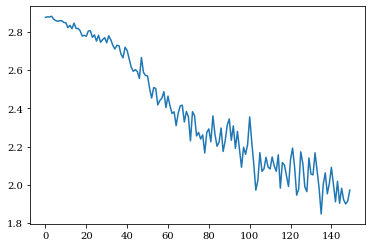

In [32]:
plt.plot(all_losses)

In [21]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Li')
predict('Liu')
predict('Huang')


> Dovesky
(-0.99) Polish
(-1.57) Czech
(-2.14) Russian

> Jackson
(-1.62) Russian
(-1.88) Irish
(-2.20) Scottish

> Satoshi
(-1.49) Polish
(-1.59) Italian
(-2.13) Czech

> Li
(-1.45) Vietnamese
(-1.52) Chinese
(-1.53) Korean

> Liu
(-1.27) Chinese
(-1.35) Korean
(-1.67) Vietnamese

> Huang
(-1.43) Vietnamese
(-1.94) Chinese
(-2.17) Korean


## 代码练习

### 1. 尝试在我们的RNN模型中添加更多layers，然后观察Loss变化

In [153]:
class RNN_more_layers(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_more_layers, self).__init__()

        self.hidden_size = hidden_size
        # 三层layer
        self.i2h_1 = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o_1 = nn.Linear(input_size + hidden_size, output_size)
        
        self.i2h_2 = nn.Linear(hidden_size, hidden_size)
        self.i2o_2 = nn.Linear(output_size, output_size)
        
        self.i2h_3 = nn.Linear(hidden_size, hidden_size)
        self.i2o_3 = nn.Linear(output_size, output_size)
        
        # 激活函数
        self.tanh = nn.Tanh()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)

        hidden = self.tanh(self.i2h_1(combined))
        output = self.tanh(self.i2o_1(combined))

        hidden = self.tanh(self.i2h_2(hidden))
        output = self.tanh(self.i2o_2(output))

        hidden = self.tanh(self.i2h_3(hidden))
        output = self.i2o_3(output)
        
        output = self.softmax(output) 
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

构建多layers的RNN

In [154]:
n_hidden = 128
n_output = n_categories
rnn = RNN_more_layers(n_letters, n_hidden, n_output)
rnn

RNN_more_layers(
  (i2h_1): Linear(in_features=185, out_features=128, bias=True)
  (i2o_1): Linear(in_features=185, out_features=18, bias=True)
  (i2h_2): Linear(in_features=128, out_features=128, bias=True)
  (i2o_2): Linear(in_features=18, out_features=18, bias=True)
  (i2h_3): Linear(in_features=128, out_features=128, bias=True)
  (i2o_3): Linear(in_features=18, out_features=18, bias=True)
  (tanh): Tanh()
  (softmax): LogSoftmax()
)

随机生成训练数据，进行训练

In [155]:
n_iters = 15000 
print_every = 500
plot_every = 100

# Keep track of losses for plotting
current_loss = 0
all_losses_more_layers = []

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses_more_layers.append(current_loss / plot_every)
        current_loss = 0

500 3% (0m 2s) 3.1478 Chun / Dutch ✗ (Korean)
1000 6% (0m 5s) 3.0733 Lee / German ✗ (Korean)
1500 10% (0m 8s) 2.9359 Nader / German ✗ (Arabic)
2000 13% (0m 11s) 2.9289 Weisener / German ✗ (Czech)
2500 16% (0m 14s) 2.8248 Phi / Chinese ✗ (Vietnamese)
3000 20% (0m 16s) 2.7990 Xing / German ✗ (Chinese)
3500 23% (0m 18s) 2.8124 Kenyon / Chinese ✗ (English)
4000 26% (0m 21s) 2.7196 Letsos / Italian ✗ (Greek)
4500 30% (0m 23s) 2.6908 Gott / German ✓
5000 33% (0m 26s) 2.7539 Rowan / German ✗ (English)
5500 36% (0m 28s) 2.8387 Viteri / Chinese ✗ (Spanish)
6000 40% (0m 31s) 2.9046 Van / English ✗ (Vietnamese)
6500 43% (0m 34s) 2.5834 Nishimura / Japanese ✓
7000 46% (0m 36s) 2.8859 Trang / Chinese ✗ (Vietnamese)
7500 50% (0m 39s) 2.7960 Cerv / English ✗ (Czech)
8000 53% (0m 41s) 3.0560 Sokolsky / German ✗ (Polish)
8500 56% (0m 44s) 2.2101 Murakami / Italian ✗ (Japanese)
9000 60% (0m 47s) 2.5084 Salcedo / Italian ✗ (Spanish)
9500 63% (0m 50s) 2.0768 Kamata / Japanese ✓
10000 66% (0m 52s) 2.5060 N

三层layers与单层layers的loss比较

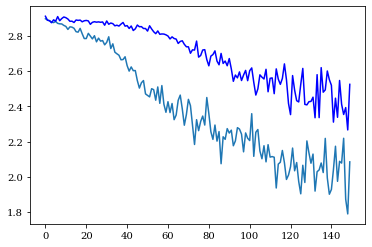

In [157]:
plt.plot(all_losses)
plt.plot(all_losses_more_layers,color = 'b') 

结论：训练次数一致，学习率一致，RNN模型含有更多layers时，loss比单时间步rnn模型降幅小

### 2. 将原始的RNN模型改成nn.LSTM和nn.GRU， 并且改变 `n_iters = 1000 ` 这个值，观察其变化

LSTM

In [23]:
class RNN_LSTM(nn.Module):
    '''
    多层lstm模型
    '''
    def __init__(self, output_activation, criterion, input_size, hidden_size, output_size, num_layers=1):
        '''
        构造函数
        ----------
        output_activation: 输出层激活函数
        criterion： 损失函数
        input_size: 输入维度
        hidden_size: hidden state和cell state的维度
        output_size: 输出维度
        num_layers: lstm层数
        '''
        super(RNN_LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size, hidden_size=hidden_size, num_layers=num_layers
        )
        self.i2o = nn.Linear(hidden_size, output_size)
        self.output_activation = output_activation 
        self.criterion = criterion
        self.hidden_size = hidden_size
        
    def forward(self, input, hidden, cell):
        '''
        前向传播
        --------------
        input: 当前时刻的输入
        hidden: 前一时刻的hidden state
        cell: 前一时刻的cell state
        '''
        # 进行前向计算，更新hidden state 和 cell state，获取output
        output, (hidden, cell) = self.lstm(input, (hidden, cell))
        # 选取最后一个时刻的output，进行最终的类别判断
        output = self.i2o(output[-1])
        output = self.output_activation(output)
        return output, hidden, cell

    def initHiddenAndCell(self):
        '''
        初始化 0 时刻的 hidden state和cell state
        '''
        return tuple(torch.zeros(2, 1, 1, self.hidden_size))
    
    def train_LSTM(self, category_tensor, line_tensor, learning_rate=0.005):
        '''
        训练LSTM
        -----------
        category_tensor: label
        line_tensor: data
        '''
        hidden, cell = self.initHiddenAndCell() 
        self.zero_grad() 
        output, hidden, cell = self.forward(line_tensor, hidden, cell) # 对输入调用forward，获取output，hidden state和cell state
        loss = self.criterion(output, category_tensor)
        loss.backward() 

        for p in self.parameters():
            p.data.add_(-learning_rate, p.grad.data)

        return output, loss.item() 
    
    def fit_LSTM(self, n_iters = 10000, print_every = 500, plot_every = 100, learning_rate=0.005):
        '''
        训练模型
        -------------
        n_iters: 训练步数
        print_every: 打印过程信息的间隔（lr_decay不为None时，也作为学习率衰减的周期）
        plot_every: 记录平均损失的间隔
        learning_rate: 初始学习率
        verbose: 训练过程是否打印输出
        '''
        # Keep track of losses for plotting
        current_loss = 0
        all_losses = []

        start = time.time() 
        for iter in range(1, n_iters + 1):
            category, line, category_tensor, line_tensor = sample_trainning() 
            output, loss = self.train_LSTM(category_tensor, line_tensor) 
            current_loss += loss 

            if iter % print_every == 0:
                guess, guess_i = category_from_output(output)
                correct = '✓' if guess == category else '✗ (%s)' % category
                print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

            if iter % plot_every == 0:
                # 记录损失
                all_losses.append(current_loss / plot_every)
                current_loss = 0
        return all_losses

In [24]:
#创建LSTM
output_activation = nn.LogSoftmax(dim=1)
criterion = nn.CrossEntropyLoss()
n_hidden = 128 
lstm = RNN_LSTM(output_activation, criterion, n_letters, n_hidden, n_categories)
# 模型结构
print(lstm)

RNN_LSTM(
  (lstm): LSTM(57, 128)
  (i2o): Linear(in_features=128, out_features=18, bias=True)
  (output_activation): LogSoftmax()
  (criterion): CrossEntropyLoss()
)


500 3% (0m 2s) 2.8471 You / Italian ✗ (Korean)
1000 6% (0m 5s) 2.9339 Mackay / Italian ✗ (Scottish)
1500 10% (0m 7s) 2.6344 Chepelyanov / Russian ✓
2000 13% (0m 10s) 2.8894 Arena / Russian ✗ (Spanish)
2500 16% (0m 12s) 2.9612 Roy / Korean ✗ (French)
3000 20% (0m 15s) 2.6823 Adigamov / Russian ✓
3500 23% (0m 17s) 2.7529 Phi / Korean ✗ (Vietnamese)
4000 26% (0m 20s) 2.7884 Tani / Italian ✗ (Japanese)
4500 30% (0m 22s) 2.8254 Crisp / Russian ✗ (English)
5000 33% (0m 25s) 2.1553 Karameros / Greek ✓
5500 36% (0m 27s) 2.7947 Vanke / French ✗ (Russian)
6000 40% (0m 31s) 2.8801 Rodrigues / Greek ✗ (Portuguese)
6500 43% (0m 34s) 2.3056 Yoo / Korean ✓
7000 46% (0m 38s) 2.8982 Watson / Irish ✗ (Scottish)
7500 50% (0m 40s) 2.2433 Ngo / Korean ✗ (Vietnamese)
8000 53% (0m 43s) 2.8070 Di pietro / Greek ✗ (Italian)
8500 56% (0m 45s) 2.8617 Kool / Vietnamese ✗ (Dutch)
9000 60% (0m 48s) 2.7508 Kajiyama / Polish ✗ (Japanese)
9500 63% (0m 51s) 3.0788 Prescott / Greek ✗ (English)
10000 66% (0m 53s) 2.4436 

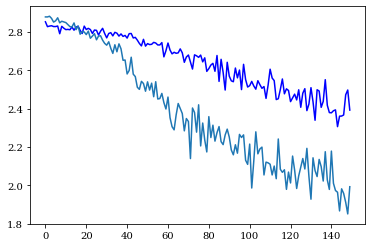

In [26]:
losses = lstm.fit_LSTM(n_iters=15000)
plt.plot(losses,color = 'b')
plt.plot(all_losses)

结论：训练次数一致，学习率一致，LSTM模型，loss比单时间步rnn模型降幅小很多

GRU

In [79]:
class RNN_GRU(nn.Module):
    def __init__(self, output_activation, criterion, input_size, hidden_size, output_size, num_layers=1):
        '''
        构造函数
        ----------
        output_activation: 输出层激活函数
        criterion： 损失函数
        input_size: 输入维度
        hidden_size: hidden state和cell state的维度
        output_size: 输出维度
        num_layers: lstm层数
        '''
        super(RNN_GRU, self).__init__()
        self.gpu = nn.GRU(
            input_size=input_size, hidden_size=hidden_size, num_layers=num_layers
        )
        self.i2o = nn.Linear(hidden_size, output_size)
        self.output_activation = output_activation 
        self.criterion = criterion
        self.hidden_size = hidden_size
        
    def forward(self, input, hidden):
        '''
        前向传播
        --------------
        input: 当前时刻的输入
        hidden: 前一时刻的hidden state
        '''
        # 进行前向计算，更新hidden state 和 cell state，获取output
        output, (hidden) = self.gpu(input, (hidden))
        # 选取最后一个时刻的output，进行最终的类别判断
        output = self.i2o(output[-1])
        output = self.output_activation(output)
        return output, hidden

    def initHidden(self):
        '''
        初始化 0 时刻的 hidden state
        '''
        return (torch.zeros( 1, 1, self.hidden_size))
    
    def train_GRU(self, category_tensor, line_tensor, learning_rate=0.005):
        '''
        训练GRU
        -----------
        category_tensor: label
        line_tensor: data
        '''
        hidden= self.initHidden() 
        self.zero_grad() 
        output, hidden= self.forward(line_tensor, hidden) # 对输入调用forward，获取output，hidden state
        loss = self.criterion(output, category_tensor)
        loss.backward() 

        for p in self.parameters():
            p.data.add_(-learning_rate, p.grad.data)

        return output, loss.item() 
    
    def fit_GRU(self, n_iters = 10000, print_every = 500, plot_every = 100, learning_rate=0.005):
        '''
        训练模型
        -------------
        n_iters: 训练步数
        print_every: 打印过程信息的间隔（lr_decay不为None时，也作为学习率衰减的周期）
        plot_every: 记录平均损失的间隔
        learning_rate: 初始学习率
        verbose: 训练过程是否打印输出
        '''
        # Keep track of losses for plotting
        current_loss = 0
        all_losses = []

        start = time.time() 
        for iter in range(1, n_iters + 1):
            category, line, category_tensor, line_tensor = sample_trainning() 
            output, loss = self.train_GRU(category_tensor, line_tensor) 
            current_loss += loss 

            if iter % print_every == 0:
                guess, guess_i = category_from_output(output)
                correct = '✓' if guess == category else '✗ (%s)' % category
                print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

            if iter % plot_every == 0:
                # 记录损失
                all_losses.append(current_loss / plot_every)
                current_loss = 0
        return all_losses

RNN_GRU(
  (gpu): GRU(57, 128)
  (i2o): Linear(in_features=128, out_features=18, bias=True)
  (output_activation): LogSoftmax()
  (criterion): CrossEntropyLoss()
)
500 3% (0m 2s) 2.9140 Baba / Scottish ✗ (Arabic)
1000 6% (0m 5s) 2.9179 Johansen / Scottish ✗ (English)
1500 10% (0m 7s) 2.9318 Shirasu / Arabic ✗ (Japanese)
2000 13% (0m 9s) 2.9266 Tankoshitsu / French ✗ (Japanese)
2500 16% (0m 12s) 2.8265 Shamoun / French ✗ (Arabic)
3000 20% (0m 14s) 2.8419 Rich / French ✗ (English)
3500 23% (0m 17s) 2.8164 Brzezicki / Italian ✗ (Polish)
4000 26% (0m 19s) 2.9831 Vijonsky / Polish ✗ (Russian)
4500 30% (0m 22s) 2.8763 Rademacher / Chinese ✗ (German)
5000 33% (0m 24s) 2.8443 Bao / Italian ✗ (Chinese)
5500 36% (0m 26s) 2.8711 Alphen / Irish ✗ (Dutch)
6000 40% (0m 29s) 2.8394 Ballaltick / Polish ✗ (Czech)
6500 43% (0m 31s) 2.7752 Charlton / Scottish ✗ (English)
7000 46% (0m 34s) 2.6622 Furusawa / Japanese ✓
7500 50% (0m 36s) 2.8103 Batchilo / Portuguese ✗ (Russian)
8000 53% (0m 38s) 2.8742 Tono

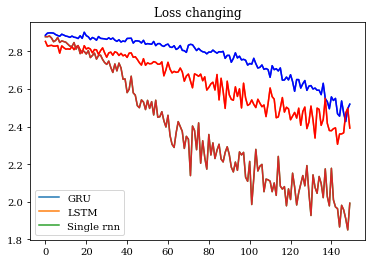

In [80]:
gru = RNN_GRU(output_activation, criterion, n_letters, n_hidden, n_categories)
# 模型结构
print(gru)
losses_gru = gru.fit_GRU(n_iters=15000)
fig, ax = plt.subplots()
ax.plot(losses_gru, label='GRU')
ax.plot(losses, label='LSTM')
ax.plot(all_losses, label='Single rnn')
plt.plot(losses_gru,color = 'b')
plt.plot(losses,color = 'r')
plt.plot(all_losses)
plt.title('Loss changing')
ax.legend()

结论：训练次数一致，学习率一致，GRU模型与LSTM模型相比，loss的降幅要大一些；但相比于单步RNN，loss的降幅还是不如它大。

### 3. 把该RNN模型变成多层RNN模型，观察Loss的变化

In [87]:
class Layer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Layer, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size) # (i + h) -> h
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

In [117]:
class MultiLayers_RNN(nn.Module):
    def __init__(self, output_activation, criterion, input_size, hidden_size, output_size, n_layers):
        super(MultiLayers_RNN,self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_szie = output_size
        self.n_layers = n_layers
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, input_size)
        self.o2o = nn.Linear(input_size, output_size)
        self.hidden_activation = nn.Tanh() # 对隐层使用tanh作为激活函数
        self.output_activation = output_activation
        self.criterion  = criterion
    def forward(self, input, hidden_list):
        hidden_updated = torch.zeros(self.n_layers, 1, self.hidden_size)
        for i in range(self.n_layers):
            hidden = hidden_list[i]
            combined = torch.cat((input,hidden), 1)
            hidden = self.i2h(combined)
            input = self.i2o(combined)
            hidden_updated[i] = self.hidden_activation(hidden)

        output = self.o2o(input)
        output = self.output_activation(output)
        return output, hidden_updated
    def initHidden(self):
        return  torch.zeros(self.n_layers, 1, self.hidden_size)
    
    def train_multi_rnn(self,category_tensor, line_tensor,learning_rate = 0.005):
        hiddens = self.initHidden()
        self.zero_grad()
        for i in range(line_tensor.size()[0]):#遍历句子中每个字
            output, hiddens = self.forward(line_tensor[i], hiddens)
        loss = self.criterion(output, category_tensor)
        loss.backward()
        for p in self.parameters():
            p.data.add_(-learning_rate, p.grad.data)
        return output, loss.item()
    
    def fit_mlrnn(self, n_iters = 10000, print_every = 500, plot_every = 100, learning_rate=0.005):
        current_loss = 0
        all_losses = []

        start = time.time() 
        for iter in range(1, n_iters + 1):
            category, line, category_tensor, line_tensor = sample_trainning() 
            output, loss = self.train_multi_rnn(category_tensor, line_tensor) 
            current_loss += loss 

            if iter % print_every == 0:
                guess, guess_i = category_from_output(output)
                correct = '✓' if guess == category else '✗ (%s)' % category
                print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

            if iter % plot_every == 0:
                # 记录损失
                all_losses.append(current_loss / plot_every)
                current_loss = 0
        return all_losses

500 3% (0m 4s) 2.8973 Chlebek / German ✗ (Polish)
1000 6% (0m 8s) 2.8774 Mingo / German ✗ (Spanish)
1500 10% (0m 12s) 2.9391 Aalst / German ✗ (Dutch)
2000 13% (0m 16s) 2.9079 Zogby / German ✗ (Arabic)
2500 16% (0m 21s) 2.9120 Kruessel / Japanese ✗ (Czech)
3000 20% (0m 25s) 2.9002 Gaspar / German ✗ (Portuguese)
3500 23% (0m 31s) 2.9375 Kang / German ✗ (Korean)
4000 26% (0m 36s) 2.8607 Mcnaught / Irish ✗ (English)
4500 30% (0m 40s) 2.8203 Bekyros / German ✗ (Greek)
5000 33% (0m 45s) 2.7628 Mcgregor / Czech ✗ (Scottish)
5500 36% (0m 49s) 2.8629 Komo / Vietnamese ✗ (Czech)
6000 40% (0m 53s) 2.1731 Tsai  / Korean ✓
6500 43% (0m 58s) 2.6501 Lebeau / Spanish ✗ (French)
7000 46% (1m 2s) 2.7500 Fiskin / English ✗ (Russian)
7500 50% (1m 6s) 2.4450 Silva / Arabic ✗ (Portuguese)
8000 53% (1m 11s) 2.7102 Mckenzie / Greek ✗ (English)
8500 56% (1m 16s) 1.3473 Mai / Chinese ✗ (Vietnamese)
9000 60% (1m 20s) 1.3720 Tong / Chinese ✓
9500 63% (1m 24s) 1.1668 Dou / Chinese ✓
10000 66% (1m 28s) 1.3647 Papad

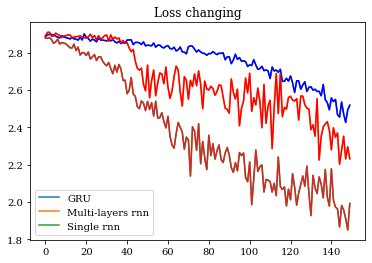

In [118]:
#创建多层rnn结构
output_activation = nn.LogSoftmax(dim=1)
criterion = nn.CrossEntropyLoss()
n_hidden = 128 
multiLayers_rnn = MultiLayers_RNN(output_activation, criterion, n_letters, n_hidden, n_categories,n_layers=3)
losses_mlrnn = multiLayers_rnn.fit_mlrnn(n_iters=15000)
# 模型结构
print(multiLayers_rnn)

fig, ax = plt.subplots()
ax.plot(losses_gru, label='GRU')
ax.plot(losses_multiL_rnn, label='Multi-layers rnn')
ax.plot(all_losses, label='Single rnn')
plt.plot(losses_gru,color = 'b')
plt.plot(losses_multiL_rnn,color = 'r')
plt.plot(all_losses)
plt.title('Loss changing')
ax.legend()

结论：训练次数一致，学习率一致，多层RNN模型与GRU模型相比，loss的降幅要大一些；但相比于单步RNN，loss的降幅还是不如它大。

### 4. Pytorch里边常用nn.NLLoss来代替crossentropy，将criterion改为nn.NLLoss，观察变化

500 3% (0m 4s) 2.9351 Nuremberg / Czech ✗ (German)
1000 6% (0m 8s) 2.8617 Rezac / Scottish ✗ (Czech)
1500 10% (0m 12s) 3.0691 Bitar / Polish ✗ (Arabic)
2000 13% (0m 17s) 2.8508 Joubert / Polish ✗ (French)
2500 16% (0m 22s) 2.8195 Petrakis / Polish ✗ (Greek)
3000 20% (0m 27s) 2.9490 Lauwers / French ✗ (Dutch)
3500 23% (0m 33s) 3.0784 Timpy / French ✗ (Czech)
4000 26% (0m 37s) 2.8713 Donoghue / French ✗ (Irish)
4500 30% (0m 42s) 3.0779 Danas / Korean ✗ (Greek)
5000 33% (0m 46s) 3.2143 Lebin / Arabic ✗ (Russian)
5500 36% (0m 51s) 2.5946 Cheharin / Italian ✗ (Russian)
6000 40% (0m 55s) 2.1611 Thuy / Korean ✗ (Vietnamese)
6500 43% (0m 59s) 2.6767 Shibasawa / Greek ✗ (Japanese)
7000 46% (1m 3s) 1.2293 Lam / Chinese ✓
7500 50% (1m 7s) 2.5881 Lovey / Arabic ✗ (English)
8000 53% (1m 12s) 2.6949 Dickson / Arabic ✗ (Scottish)
8500 56% (1m 16s) 1.3057 Thao / Chinese ✗ (Vietnamese)
9000 60% (1m 21s) 2.1281 Shuai / Chinese ✓
9500 63% (1m 25s) 3.0737 Rosa / Vietnamese ✗ (Spanish)
10000 66% (1m 29s) 2

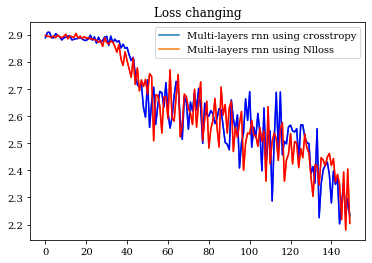

In [122]:
#创建多层rnn结构
output_activation = nn.LogSoftmax(dim=1)
criterion = nn.NLLLoss()
n_hidden = 128 
multiLayers_rnn2 = MultiLayers_RNN(output_activation, criterion, n_letters, n_hidden, n_categories,n_layers=3)
NLLosses_mlrnn = multiLayers_rnn2.fit_mlrnn(n_iters=15000)

fig, ax = plt.subplots()

ax.plot(losses_multiL_rnn, label='Multi-layers rnn using crosstropy')
ax.plot(NLLosses_mlrnn, label='Multi-layers rnn using Nlloss')
plt.plot(losses_multiL_rnn,color = 'b')
plt.plot(NLLosses_mlrnn,color = 'r')

plt.title('Loss changing')
ax.legend()

总结：nn.NLLoss与crossentropy在梯度下降时，loss变化近乎相似